In [55]:
import numpy as np

from keras.datasets import mnist
from keras.layers   import Input, Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.models   import Model, Sequential, clone_model

import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test  = x_test.astype( 'float32') / 255.
x_train = np.reshape( x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape( x_test,  (len(x_test), 28, 28, 1))
input_shape = x_train.shape[1:]
print x_train.shape
print x_test.shape

(60000, 28, 28, 1)
(10000, 28, 28, 1)


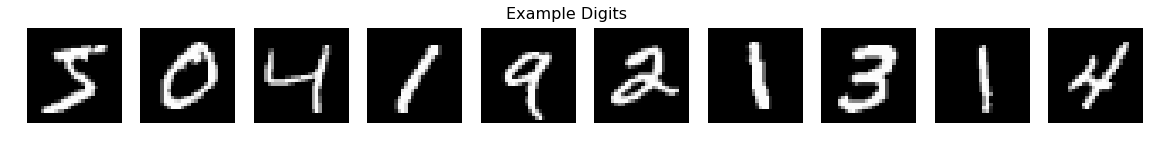

In [39]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow( x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('Example Digits', fontsize=16)
plt.show()

In [23]:
ae_model1 = Sequential()
# encoder
ae_model1.add( Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=input_shape))
ae_model1.add( MaxPooling2D(pool_size=(2, 2)))
# decoder
ae_model1.add( Conv2D( 1, (3, 3), activation='relu', padding='same'))
ae_model1.add( UpSampling2D((2,2)))

ae_model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 1)         145       
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 1)         0         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [25]:
ae_model1.compile( optimizer='adadelta', loss='binary_crossentropy')

In [26]:
ae_model1.fit( x_train, x_train,
               epochs=50,
               batch_size=128,
               shuffle=True,
               validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 25s 411us/step - loss: 0.1593 - val_loss: 0.1156
Epoch 2/50
60000/60000 [==============================] - 24s 396us/step - loss: 0.1151 - val_loss: 0.1130
Epoch 3/50
60000/60000 [==============================] - 24s 396us/step - loss: 0.1136 - val_loss: 0.1123
Epoch 4/50
60000/60000 [==============================] - 24s 397us/step - loss: 0.1128 - val_loss: 0.1119
Epoch 5/50
60000/60000 [==============================] - 24s 392us/step - loss: 0.1122 - val_loss: 0.1126
Epoch 6/50
60000/60000 [==============================] - 23s 391us/step - loss: 0.1117 - val_loss: 0.1105
Epoch 7/50
60000/60000 [==============================] - 23s 390us/step - loss: 0.1113 - val_loss: 0.1102
Epoch 8/50
60000/60000 [==============================] - 24s 393us/step - loss: 0.1110 - val_loss: 0.1101
Epoch 9/50
60000/60000 [==============================] - 24s 392us/step - loss: 0.1108 - val_

In [35]:
x_test_recon = ae_model1.predict(x_test)

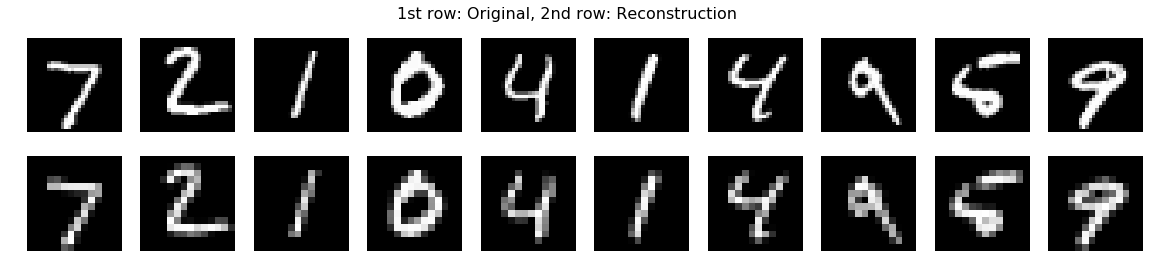

In [36]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot( 2, n, i+1)
    plt.imshow( x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # display reconstruction
    ax = plt.subplot( 2, n, n+i+1)
    plt.imshow( x_test_recon[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('1st row: Original, 2nd row: Reconstruction', fontsize=16)
plt.show()

## Second AE model

Encoder and decoder both have 3 convolutional layers.

In [47]:
ae_model2 = Sequential()
# encoder
ae_model2.add( Conv2D(16, (5, 5), activation='relu', padding='same', input_shape=input_shape))
ae_model2.add( MaxPooling2D(pool_size=(2, 2)))
ae_model2.add( Conv2D(16, (5, 5), activation='relu', padding='same'))
ae_model2.add( MaxPooling2D(pool_size=(2, 2)))
ae_model2.add( Conv2D(32, (3, 3), activation='relu', padding='same'))
ae_model2.add( MaxPooling2D(pool_size=(2, 2)))
# decoder
ae_model2.add( Conv2D(32, (3, 3), activation='relu', padding='same'))
ae_model2.add( UpSampling2D((2,2)))
ae_model2.add( Conv2D(16, (5, 5), activation='relu', padding='same'))
ae_model2.add( UpSampling2D((2,2)))
ae_model2.add( ZeroPadding2D( padding=(1,1)))
ae_model2.add( Conv2D(16, (5, 5), activation='relu', padding='same'))
ae_model2.add( UpSampling2D((2,2)))
ae_model2.add( Conv2D( 1, (3, 3), activation='relu', padding='same'))

ae_model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 14, 16)        6416      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 7, 7, 32)          4640      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 3, 32)          9248      
__________

In [51]:
ae_model2.compile( optimizer='adadelta', loss='binary_crossentropy')

In [52]:
history_ae2 = ae_model2.fit( x_train, x_train,
                            epochs=50,
                            batch_size=256,
                            shuffle=True,
                            validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.2372 - val_loss: 0.1880
Epoch 2/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1863 - val_loss: 0.1709
Epoch 3/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1684 - val_loss: 0.1723
Epoch 4/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1603 - val_loss: 0.1544
Epoch 5/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1527 - val_loss: 0.1414
Epoch 6/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1528 - val_loss: 0.1451
Epoch 7/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1510 - val_loss: 0.1745
Epoch 8/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1451 - val_loss: 0.1322
Epoch 9/50
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1441 - val_loss: 0.1360
Epoch

In [53]:
x_test_recon = ae_model2.predict(x_test)

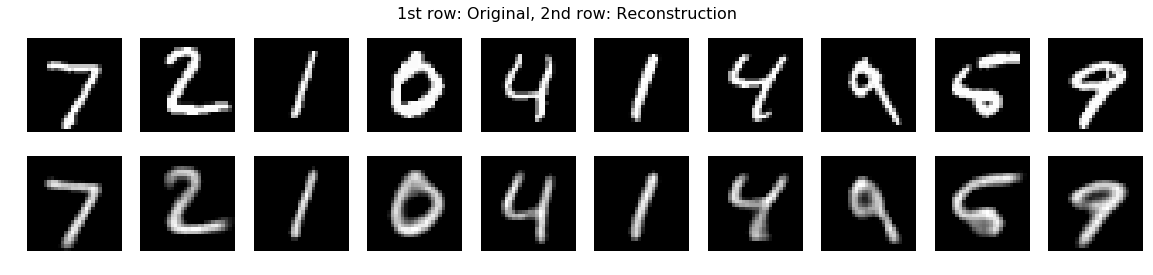

In [54]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot( 2, n, i+1)
    plt.imshow( x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    # display reconstruction
    ax = plt.subplot( 2, n, n+i+1)
    plt.imshow( x_test_recon[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.suptitle('1st row: Original, 2nd row: Reconstruction', fontsize=16)
plt.show()

## Denoising Autoencoder

In [56]:
model_copy = clone_model( ae_model2)
model_copy.set_weights( ae_model2.get_weights())

In [59]:
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy  = x_test  + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip( x_train_noisy, 0., 1.)
x_test_noisy  = np.clip( x_test_noisy,  0., 1.)

In [60]:
model_copy.compile( optimizer='adam', loss='binary_crossentropy')

In [61]:
history_aecopy = model_copy.fit( x_train_noisy, x_train,
                                epochs=10,
                                batch_size=256,
                                shuffle=True,
                                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1660 - val_loss: 0.1443
Epoch 2/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1865 - val_loss: 0.1879
Epoch 3/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2039 - val_loss: 0.2446
Epoch 4/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.1936 - val_loss: 0.1729
Epoch 5/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1759 - val_loss: 0.1647
Epoch 6/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1767 - val_loss: 0.2085
Epoch 7/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1931 - val_loss: 0.2042
Epoch 8/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.1715 - val_loss: 0.1733
Epoch 9/10
60000/60000 [==============================] - 67s 1ms/step - loss: 0.2040 - val_loss: 0.2030
Epoch

In [62]:
x_test_recon = ae_model2.predict(x_test_noisy)

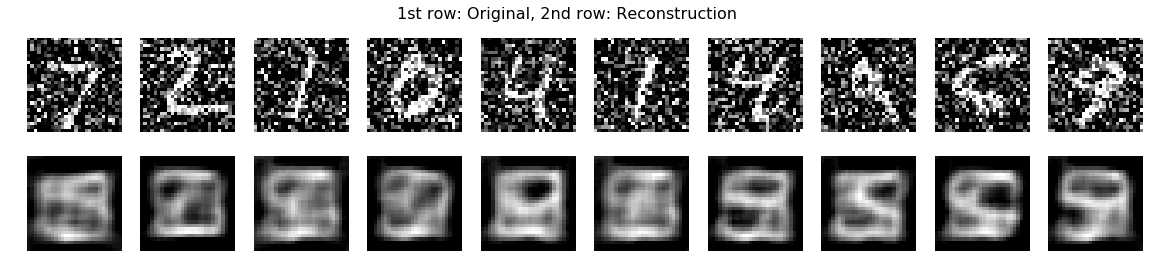

In [75]:
n = 10
fig, ax = plt.subplots( 2, n, figsize=(20, 4))
for i, subplot in enumerate(ax[0]):
    subplot.imshow( x_test_noisy[i].reshape(28, 28), cmap='gray')
    subplot.axis('off')
for i, subplot in enumerate(ax[1]):
    subplot.imshow( x_test_recon[i].reshape(28, 28), cmap='gray')
    subplot.axis('off')

fig.suptitle('1st row: Original, 2nd row: Reconstruction', fontsize=16);
fig.savefig